<h2 style='color:blue' align='center'>Celebrity Image Classification: Data Cleaning<h2>

Special thanks to Debjyoti Paul (My data scientist friend at Amazon) for help with this project

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

In [2]:
img = cv2.imread('./Test_Images/043_9bfd94a4.jpg')
img.shape

(534, 474, 3)

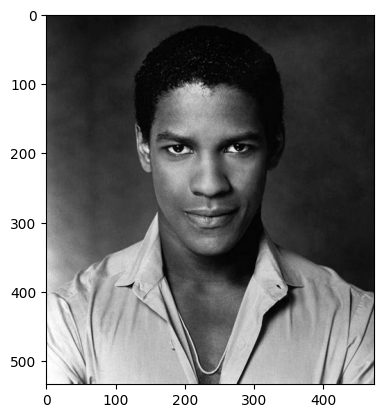

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(534, 474)

In [5]:
gray

array([[ 39,  40,  39, ...,  27,  27,  27],
       [ 39,  40,  39, ...,  27,  27,  27],
       [ 39,  39,  38, ...,  26,  26,  26],
       ...,
       [255, 255, 255, ..., 165, 173, 171],
       [255, 255, 255, ..., 177, 186, 183],
       [255, 255, 255, ..., 181, 190, 187]], shape=(534, 474), dtype=uint8)

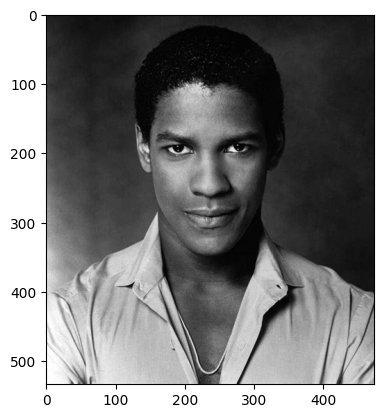

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./OpenCV/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./OpenCV/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[137, 118, 200, 200]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(137), np.int32(118), np.int32(200), np.int32(200))

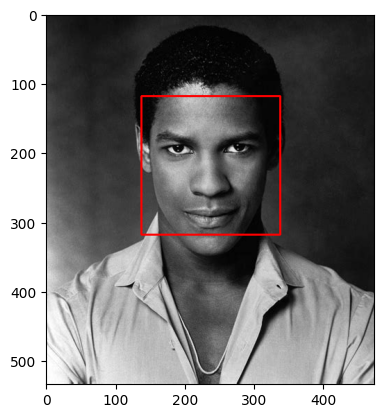

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

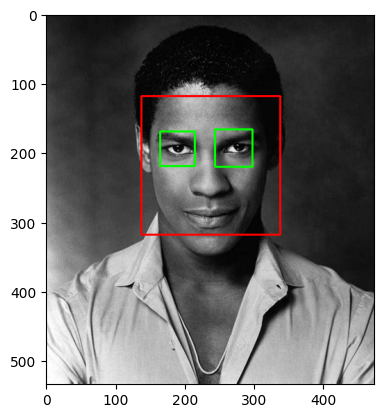

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

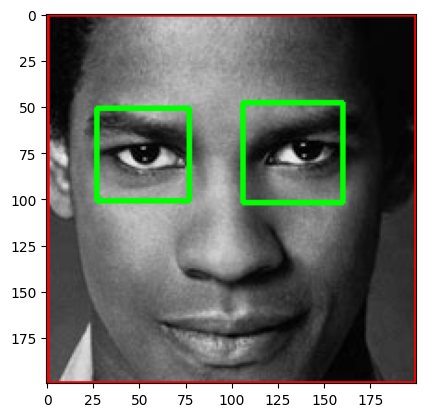

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

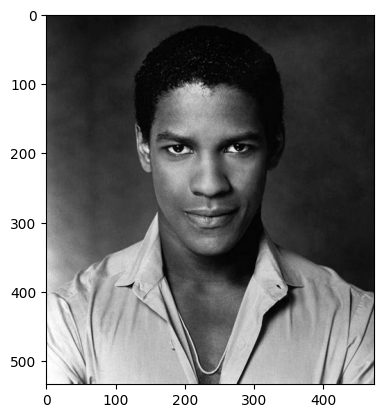

In [13]:
original_image = cv2.imread('./Test_Images/043_9bfd94a4.jpg')
plt.imshow(original_image)

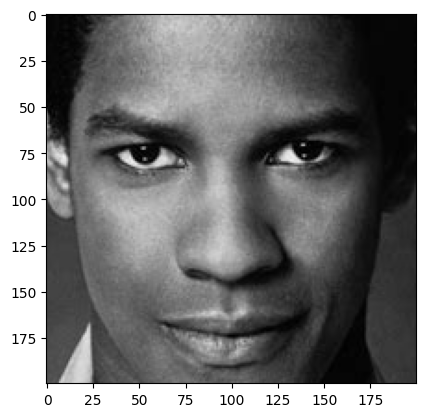

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./Test_Images/043_9bfd94a4.jpg')
plt.imshow(cropped_image)

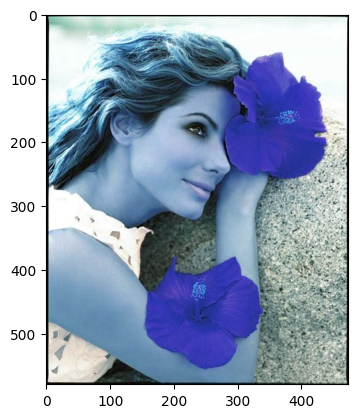

In [15]:
org_image_obstructed = cv2.imread('./Test_Images/100_e1433988.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./Test_Images/100_e1433988.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data = "./Celebrity_Faces_Dataset/"
path_to_cr_data = "./Celebrity_Faces_Dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./Celebrity_Faces_Dataset/Angelina Jolie',
 './Celebrity_Faces_Dataset/Brad Pitt',
 './Celebrity_Faces_Dataset/cropped',
 './Celebrity_Faces_Dataset/Denzel Washington',
 './Celebrity_Faces_Dataset/Hugh Jackman',
 './Celebrity_Faces_Dataset/Jennifer Lawrence',
 './Celebrity_Faces_Dataset/Johnny Depp',
 './Celebrity_Faces_Dataset/Kate Winslet',
 './Celebrity_Faces_Dataset/Leonardo DiCaprio',
 './Celebrity_Faces_Dataset/Megan Fox',
 './Celebrity_Faces_Dataset/Natalie Portman',
 './Celebrity_Faces_Dataset/Nicole Kidman',
 './Celebrity_Faces_Dataset/Robert Downey Jr',
 './Celebrity_Faces_Dataset/Sandra Bullock',
 './Celebrity_Faces_Dataset/Scarlett Johansson',
 './Celebrity_Faces_Dataset/Tom Cruise',
 './Celebrity_Faces_Dataset/Tom Hanks',
 './Celebrity_Faces_Dataset/Will Smith']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    if celebrity_name == "cropped":
        continue  # Skip the cropped directory itself

    count = 1
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file():
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                    
                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1    

Angelina Jolie
Brad Pitt
Denzel Washington
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Denzel Washington
Hugh Jackman
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Hugh Jackman
Jennifer Lawrence
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Jennifer Lawrence
Johnny Depp
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Johnny Depp
Kate Winslet
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Kate Winslet
Leonardo DiCaprio
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Leonardo DiCaprio
Megan Fox
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Megan Fox
Natalie Portman
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Natalie Portman
Nicole Kidman
Generating cropped images in folder:  ./Celebrity_Faces_Dataset/cropped/Nicole Kidman
Robert Downey Jr
Generating cropped images in folder:  ./Celebr